In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from scipy.special import comb
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Desafio 2: Determinando o Estoque de Segurança.

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama "desova".
Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.
Para responder esse desafio, antes vamos abordar alguns conceitos importantes na indústria:

    ● Estoque de segurança: é uma quantidade de estoques que se tem, mas que não se deseja usar. É como um seguro do carro: é bom ter um, mas você não quer precisar usá-lo. Isto porque ele é calculado apenas para suprir uma segurança em casos de variações inesperadas, algo que você não pode prever ou controlar: problemas no fornecedor, atrasos na entrega, uma demanda que não foi prevista...

    ● Demanda: se a demanda é bem estável e conhecida com antecedência, então temos pouca variabilidade a cada mês e não precisamos nos proteger muito contra essas variações (pois sabemos que elas não ocorrem); por outro lado, se seu produto tem uma variabilidade nas vendas muito grande, então precisaremos de estoque de segurança maior. Isto tudo é medido matematicamente através do desvio padrão da demanda, que neste caso é calculado como o desvio padrão da previsão da demanda. Um bom sistema de previsões é capaz de oferecer este número, ou ele pode ser estimado de maneiras mais simples, mas menos precisas.

    ● Lead time (tempo de entrega) do produto: se o tempo de entrega é elevado e sua variabilidade é alta (se uma entrega é feita em 5 dias, outra em 8 dias, outra em 2 dias), então é preciso ter uma segurança frente à este tempo média de entrega de 5 dias, pois algumas vezes ela chega a demorar 8 dias. Mas não queremos nos planejar sempre para receber apenas depois de 8 dias, pois isto acarretaria custos muito altos, então o estoque de segurança utiliza a estatística para auxiliar nessa tarefa.

    ● Nível de serviço desejado: nem todos os produtos merecem a mesma atenção e o mesmo cuidado; alguns produtos são críticos, mais importantes ou mais atrativos, e por isso merecem estar sempre presentes, enquanto em outros produtos podemos nos dar ao luxo de não tê-lo em estoque sempre. Matematicamente, isto é modelado através do nível de serviço desejado: quanto maior o nível de serviço (um número percentual de 0 a 100), maior será o estoque de segurança pois queremos mais garantias que o produto estará sempre disponível. O nível de serviço depende de cada setor: palitos de fósforo num supermercado não devem ter nível de serviço muito alto, enquanto antibióticos numa farmácia hospitalar devem ter nível de serviço altíssimo. O nível de serviço indica o quanto queremos estar seguros frente às variabilidades que ocorrem, em outras palavras, frente aos desvios padrões da demanda e do lead time.

    ● A Fórmula Mãe do Estoque de segurança: A maioria das indústrias calcula o estoque de segurança tomando como base a distribuição normal. Assumindo que suas vendas seguem essa distribuição, ela irá determinar qual a probabilidade de se vender certo produto.

Por exemplo, se você vende na média 1000 unidades de produto por semana, a distribuição mostra que você tem uma alta probabilidade de vender em torno de 1000 todas as semanas, e uma baixa probabilidade de esse número ser 20 ou 200000 de produtos vendidos.

Assim, você pode utilizar a distribuição normal, para entender qual o seu nível de serviço desejado. Ou seja, se você deseja um nível de serviço de 90%, a curva normal irá te fornecer o multiplicador desejado (variações da média) para você alcançar 90% da demanda.

Portanto, matematicamente, podemos determinar o estoque de segurança utilizando os conceitos abordados em estatística, como a tabela da distribuição normal, utilizando a fórmula abaixo.

Estoque de Segurança = 𝑍 * σ2𝑑𝑡 + σ2𝑡 𝑑2 sendo :

z = o valor da tabela da distribuição normal, que indica a quantos desvios padrões ao redor da média temos que tomar para cobrir a proporção da área sob a curva normal /nível de serviço desejado.

d = demanda média passada ou estimada
t = lead time médio.

σ𝑑 = desvio padrão / variação da demanda

σ𝑡= desvio padrão / variação do lead time

Assim se o tempo de entrega tiver pouca variabilidade a fórmula pode ser
aproximada por :

Estoque de Segurança = 𝑍 * σ2𝑑𝑡
e a intuição da fórmula pode ser vista como : O quanto de variação da média da demanda eu estou disposto a aceitar além do natural (z-score do nível de serviço) * desvio médio da demanda que já ocorre naturalmente * tempo de entrega.

Matematicamente o valor obtido pela fórmula deve ser sempre arredondado para cima, para garantir que estamos cobertos contra variações indesejadas.

### O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os dados de vendas de iogurte e o lead time de 2015 a 2022.

1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

2. Assuma que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

links de referencias:

[calculo-estoque](https://practicaldatascience.co.uk/data-science/how-to-calculate-safety-stock-and-reorder-point)

[formulas-calculo-estoque](https://www.unleashedsoftware.com/blog/how-to-calculate-safety-stock-with-formulas-and-examples)

[predicoes](https://towardsdatascience.com/inventory-management-using-python-17cb7ddf9314)

### Entendendo os dados

In [2]:
data = pd.read_csv('desafio_02_estoque.csv')

In [3]:
data

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


In [4]:
data.shape

(370, 3)

In [5]:
data.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


### Análise dos dados

Distribuição de vendas e lead time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


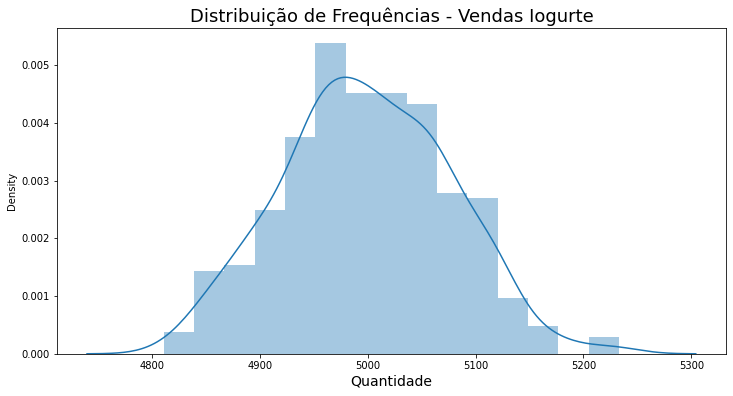

In [7]:
ax = sns.distplot(data['vendas-iogurte'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Vendas Iogurte', fontsize=18)
ax.set_xlabel('Quantidade', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


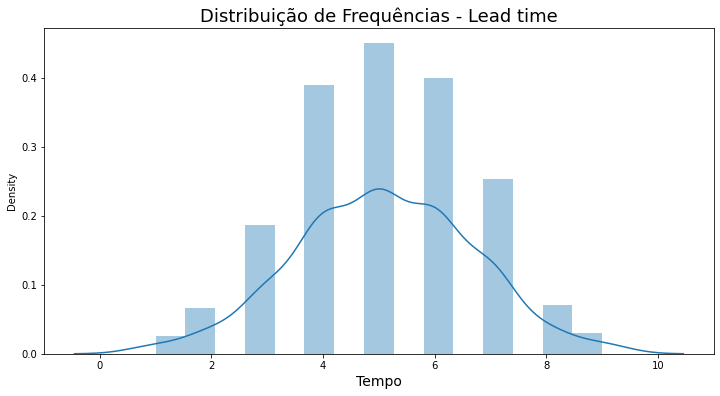

In [8]:
ax = sns.distplot(data['lead-time'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Lead time', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [9]:
data.head(5)

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [10]:
media_vendas = round(data['vendas-iogurte'].mean())
media_vendas

4999

In [11]:

qtd_maxima_vendida = round(data['vendas-iogurte'].max())
qtd_maxima_vendida


5233

In [12]:
media_lead_time = round(data['lead-time'].mean())
media_lead_time

5

In [13]:
max_lead_time = data['lead-time'].max()
max_lead_time


9

In [14]:
estoque_seguranca = round( (qtd_maxima_vendida * max_lead_time) - (media_vendas * media_lead_time) ) 
estoque_seguranca

22102